<a href="https://colab.research.google.com/github/learner197/Research-Project/blob/RP-CAE/kamal_rp_CAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import os

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from PIL import Image as im
#import cv2
import plotly.express as px

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
tf

<module 'tensorflow' from '/usr/local/lib/python3.8/dist-packages/tensorflow/__init__.py'>

In [4]:
image_dir_1 = Path('/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/activity_spectogram_77GHz')
image_dir_2 = Path('/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/spectogram_Xethru')
image_dir_3 = Path('/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/Spectrograms_24GHz')


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
Filepath_1=[]
Label_1=[]

for file in os.listdir(image_dir_1):
    file_dir = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/activity_spectogram_77GHz/{}".format(file)
    for file_name in os.listdir(file_dir):
        path = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/activity_spectogram_77GHz/{}/{}".format(file,file_name)
        Filepath_1.append(path)
        Label_1.append(file)
        
Filepath_2=[]
Label_2=[]

for file in os.listdir(image_dir_2):
    file_dir = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/spectogram_Xethru/{}".format(file)
    for file_name in os.listdir(file_dir):
        path = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/spectogram_Xethru/{}/{}".format(file,file_name)
        Filepath_2.append(path)
        Label_2.append(file)
        
Filepath_3=[]
Label_3=[]

for file in os.listdir(image_dir_3):
    file_dir = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/Spectrograms_24GHz/{}".format(file)
    for file_name in os.listdir(file_dir):
        path = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/Spectrograms_24GHz/{}/{}".format(file,file_name)
        Filepath_3.append(path)
        Label_3.append(file)

In [7]:
image_df_1 = pd.DataFrame(
    {'Filepath': Filepath_1,
     'Label': Label_1
    })
image_df_1

image_df_2 = pd.DataFrame(
    {'Filepath': Filepath_2,
     'Label': Label_2
    })
image_df_2

image_df_3 = pd.DataFrame(
    {'Filepath': Filepath_3,
     'Label': Label_3
    })

print(image_df_1.shape)
print(image_df_2.shape)
print(image_df_3.shape)

(649, 2)
(735, 2)
(1926, 2)


In [64]:
image_df_1

,Filepath,Label
0,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,16_Walking_on_both_toes
1,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,16_Walking_on_both_toes
2,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,16_Walking_on_both_toes
3,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,16_Walking_on_both_toes
4,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,16_Walking_on_both_toes
...,...,...
644,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,07_picking_up_an_object
645,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,07_picking_up_an_object
646,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,07_picking_up_an_object
647,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,07_picking_up_an_object


In [65]:
image_df_2

,Filepath,Label
0,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,11_crawling
1,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,11_crawling
2,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,11_crawling
3,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,11_crawling
4,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,11_crawling
...,...,...
730,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,06_walking_away_from_Radar
731,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,06_walking_away_from_Radar
732,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,06_walking_away_from_Radar
733,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,06_walking_away_from_Radar


In [66]:
image_df_3

,Filepath,Label
0,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,17_limping_with_right_leg_stiff
1,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,17_limping_with_right_leg_stiff
2,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,17_limping_with_right_leg_stiff
3,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,17_limping_with_right_leg_stiff
4,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,17_limping_with_right_leg_stiff
...,...,...
1921,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,05_Walking_towards_radar
1922,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,05_Walking_towards_radar
1923,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,05_Walking_towards_radar
1924,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,05_Walking_towards_radar


Text(0.5, 1.0, 'Frequency of each class in 77GHZ-data')

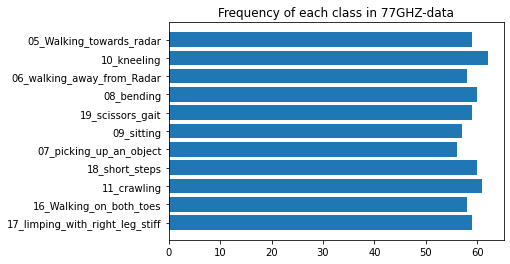

In [67]:
d=dict()
for i in set(Label_1):
    d[i]=0
for i in Label_1:
    d[i]=d[i]+1
d
y_graph=[]
x_graph=[]
j=0
for i in set(Label_1):
    x_graph.append(i)
    y_graph.append(d[i])
plt.barh(x_graph,y_graph)
plt.title("Frequency of each class in 77GHZ-data")

Text(0.5, 1.0, 'Frequency of each class in Xethru-data')

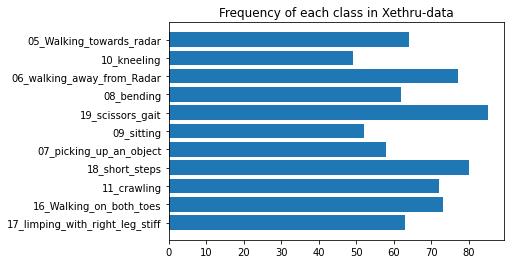

In [68]:
d=dict()
for i in set(Label_2):
    d[i]=0
for i in Label_2:
    d[i]=d[i]+1
d
y_graph=[]
x_graph=[]
j=0
for i in set(Label_2):
    x_graph.append(i)
    y_graph.append(d[i])
plt.barh(x_graph,y_graph)
plt.title("Frequency of each class in Xethru-data")

Text(0.5, 1.0, 'Frequency of each class in 24GHZ-data')

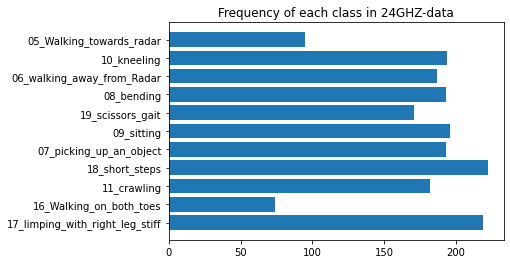

In [52]:
d=dict()
for i in set(Label_3):
    d[i]=0
for i in Label_3:
    d[i]=d[i]+1
d
y_graph=[]
x_graph=[]
j=0
for i in set(Label_3):
    x_graph.append(i)
    y_graph.append(d[i])
plt.barh(x_graph,y_graph)
plt.title("Frequency of each class in 24GHZ-data")

In [ ]:
plt.bar??

In [8]:
"""
from keras.datasets import mnist
(x_train,_),(x_test,_)=mnist.load_data()
"""

11490434/11490434 [==============================] - 2s 0us/step


In [10]:
type(x_train)

numpy.ndarray

In [8]:
train_df_1, test_df_1 = train_test_split(image_df_1, train_size=0.7, shuffle=True, random_state=1)
train_df_2, test_df_2 = train_test_split(image_df_2, train_size=0.7, shuffle=True, random_state=1)
train_df_3, test_df_3 = train_test_split(image_df_3, train_size=0.7, shuffle=True, random_state=1)

In [12]:
train_df_1

,Filepath,Label
358,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,10_kneeling
74,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,11_crawling
640,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,07_picking_up_an_object
423,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,09_sitting
61,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,11_crawling
...,...,...
144,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,17_limping_with_right_leg_stiff
645,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,07_picking_up_an_object
72,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,11_crawling
235,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,08_bending


In [9]:
train_generator_1 = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator_1 = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_generator_2 = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator_2 = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_generator_3 = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator_3 = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [23]:
train_generator_1

In [ ]:
type(train_generator_1)

keras.preprocessing.image.ImageDataGenerator

In [10]:
train_images_1 = train_generator_1.flow_from_dataframe(
    dataframe=train_df_1,
    x_col='Filepath',
    y_col='Label',
    target_size=(64,64),
    color_mode='grayscale',
    class_mode='input',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images_1 = train_generator_1.flow_from_dataframe(
    dataframe=train_df_1,
    x_col='Filepath',
    y_col='Label',
    target_size=(64,64),
    color_mode='grayscale',
    class_mode='input',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images_1 = test_generator_1.flow_from_dataframe(
    dataframe=test_df_1,
    x_col='Filepath',
    y_col='Label',
    target_size=(64,64),
    color_mode='grayscale',
    class_mode='input',
    batch_size=16,
    shuffle=False
)


train_images_2 = train_generator_2.flow_from_dataframe(
    dataframe=train_df_2,
    x_col='Filepath',
    y_col='Label',
    target_size=(64,64),
    color_mode='grayscale',
    class_mode='input',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images_2 = train_generator_2.flow_from_dataframe(
    dataframe=train_df_2,
    x_col='Filepath',
    y_col='Label',
    target_size=(64,64),
    color_mode='grayscale',
    class_mode='input',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images_2 = test_generator_2.flow_from_dataframe(
    dataframe=test_df_2,
    x_col='Filepath',
    y_col='Label',
    target_size=(64,64),
    color_mode='grayscale',
    class_mode='input',
    batch_size=16,
    shuffle=False
)


train_images_3 = train_generator_3.flow_from_dataframe(
    dataframe=train_df_3,
    x_col='Filepath',
    y_col='Label',
    target_size=(64,64),
    color_mode='grayscale',
    class_mode='input',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images_3 = train_generator_3.flow_from_dataframe(
    dataframe=train_df_3,
    x_col='Filepath',
    y_col='Label',
    target_size=(64,64),
    color_mode='grayscale',
    class_mode='input',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images_3 = test_generator_3.flow_from_dataframe(
    dataframe=test_df_3,
    x_col='Filepath',
    y_col='Label',
    target_size=(64,64),
    color_mode='grayscale',
    class_mode='input',
    batch_size=16,
    shuffle=False
)

Found 363 validated image filenames.
Found 90 validated image filenames.
Found 195 validated image filenames.


/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(


Found 412 validated image filenames.
Found 102 validated image filenames.
Found 221 validated image filenames.
Found 1073 validated image filenames.


/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 7 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(


Found 268 validated image filenames.
Found 574 validated image filenames.


/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 4 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
"""train_images_1 = train_generator_1.flow_from_dataframe(
    dataframe=train_df_1,
    x_col='Filepath',
    y_col='Label',
    target_size=(252,252),
    color_mode='grayscale',
    class_mode='input',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images_1 = train_generator_1.flow_from_dataframe(
    dataframe=train_df_1,
    x_col='Filepath',
    y_col='Label',
    target_size=(252,252),
    color_mode='grayscale',
    class_mode='input',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images_1 = test_generator_1.flow_from_dataframe(
    dataframe=test_df_1,
    x_col='Filepath',
    y_col='Label',
    target_size=(252,252),
    color_mode='grayscale',
    class_mode='input',
    batch_size=16,
    shuffle=False
)


train_images_2 = train_generator_2.flow_from_dataframe(
    dataframe=train_df_2,
    x_col='Filepath',
    y_col='Label',
    target_size=(252,252),
    color_mode='grayscale',
    class_mode='input',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images_2 = train_generator_2.flow_from_dataframe(
    dataframe=train_df_2,
    x_col='Filepath',
    y_col='Label',
    target_size=(252,252),
    color_mode='grayscale',
    class_mode='input',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images_2 = test_generator_2.flow_from_dataframe(
    dataframe=test_df_2,
    x_col='Filepath',
    y_col='Label',
    target_size=(252,252),
    color_mode='grayscale',
    class_mode='input',
    batch_size=16,
    shuffle=False
)


train_images_3 = train_generator_3.flow_from_dataframe(
    dataframe=train_df_3,
    x_col='Filepath',
    y_col='Label',
    target_size=(252,252),
    color_mode='grayscale',
    class_mode='input',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images_3 = train_generator_3.flow_from_dataframe(
    dataframe=train_df_3,
    x_col='Filepath',
    y_col='Label',
    target_size=(252,252),
    color_mode='grayscale',
    class_mode='input',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images_3 = test_generator_3.flow_from_dataframe(
    dataframe=test_df_3,
    x_col='Filepath',
    y_col='Label',
    target_size=(252,252),
    color_mode='grayscale',
    class_mode='input',
    batch_size=16,
    shuffle=False
)"""

In [ ]:
type(train_images_1)

keras.preprocessing.image.DataFrameIterator

In [20]:
#train_images_1=train_images_1.astype('float32')/255

AttributeError: ignored

In [18]:
test_df_3.shape[0]

578

In [ ]:
col_names=['77GHZ','Xethru','24GHZ']
#col_vals=[],[train_df_2.shape[0],test_df_2.shape[0]],[train_df_3.shape[0],test_df_3.shape[0]]]
d={'77GHZ':[train_df_1.shape[0],test_df_1.shape[0]],
   'Xethru':[train_df_2.shape[0],test_df_2.shape[0]],
   '24GHZ':[train_df_3.shape[0],test_df_3.shape[0]]
}
images_summary = pd.DataFrame(d)
images_summary.index=['training_images','testing_images']
images_summary

,77GHZ,Xethru,24GHZ
training_images,454,514,1348
testing_images,195,221,578


In [ ]:
print(len(train_images_1),train_images_1.image_shape)
print(len(val_images_1),val_images_1.image_shape)
print(len(test_images_1),test_images_1.image_shape)

23 (64, 64, 1)
6 (64, 64, 1)
13 (64, 64, 1)


In [ ]:
image_df_1

,Filepath,Label
0,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,16_Walking_on_both_toes
1,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,16_Walking_on_both_toes
2,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,16_Walking_on_both_toes
3,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,16_Walking_on_both_toes
4,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,16_Walking_on_both_toes
...,...,...
644,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,07_picking_up_an_object
645,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,07_picking_up_an_object
646,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,07_picking_up_an_object
647,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,07_picking_up_an_object


In [ ]:
train_df_1.head()

,Filepath,Label
358,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,10_kneeling
74,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,11_crawling
640,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,07_picking_up_an_object
423,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,09_sitting
61,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,11_crawling


In [ ]:
train_generator_1

In [ ]:
train_images_1

In [1]:
#train_generator_1.shape()

In [ ]:
"""from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

import keras
from keras import layers

input_img = keras.Input(shape=(128, 128, 1))

x = layers.Conv2D(64, (9, 9),activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2),strides=(2,2),padding='same')(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2),strides=(2,2), padding='same')(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2),strides=(2,2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)

decoded = layers.Conv2D(64, (9, 9), activation='softmax', padding='same')(x)
#x = layers.UpSampling2D((2, 2))(x)

#x = layers.Conv2D(64, (3, 3),strides=(2,2), activation='relu')(x)
#x = layers.UpSampling2D((2, 2))(x)
#decoded = layers.Conv2D(1, (3, 3),strides=(2,2), activation='softmax', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['acc'])
#model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])
"""

<IPython.core.display.Javascript object>

## Convolutional AutoEncoder

In [24]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

import keras

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Define the input layer
input_img = Input(shape=(64, 64, 1))

# Encoder
x = Conv2D(32, (9, 9), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2),strides=(2,2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2),strides=(2,2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (9, 9), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='softmax', padding='same')(x)

# Define the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
#autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss = 'mean_squared_error')
autoencoder.summary()

<IPython.core.display.Javascript object>

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        2624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 64)        3692

In [25]:
autoencoder.fit(train_images_1,
          epochs=10, 
          batch_size=16,
          validation_data=val_images_1)

Epoch 1/10
23/23 [==============================] - 14s 585ms/step - loss: 0.6723 - accuracy: 0.0000e+00 - val_loss: 0.6106 - val_accuracy: 0.0000e+00
Epoch 2/10
23/23 [==============================] - 13s 556ms/step - loss: 0.3964 - accuracy: 0.0000e+00 - val_loss: 0.1129 - val_accuracy: 0.0000e+00
Epoch 3/10
23/23 [==============================] - 13s 554ms/step - loss: 0.0240 - accuracy: 0.0000e+00 - val_loss: -0.0131 - val_accuracy: 0.0000e+00
Epoch 4/10
23/23 [==============================] - 13s 552ms/step - loss: -0.0209 - accuracy: 0.0000e+00 - val_loss: -0.0290 - val_accuracy: 0.0000e+00
Epoch 5/10
23/23 [==============================] - 15s 653ms/step - loss: -0.0358 - accuracy: 0.0000e+00 - val_loss: -0.0464 - val_accuracy: 0.0000e+00
Epoch 6/10
23/23 [==============================] - 14s 624ms/step - loss: -0.0593 - accuracy: 0.0000e+00 - val_loss: -0.0804 - val_accuracy: 0.0000e+00
Epoch 7/10
23/23 [==============================] - 13s 550ms/step - loss: -0.1108 - ac

In [27]:
autoencoder

In [ ]:
#results_1_1=autoencoder.evaluate(test_images_1,batch_size=32)

In [ ]:
#type(results_1_1)

In [ ]:
# save the cae to file
autoencoder.save('autoencoder.h5')

In [14]:
encoder = keras.Model(input_img, encoded)
x = layers.Flatten()(encoder.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(11, activation='softmax')(x)
model1=tf.keras.models.Model(encoder.input,x)
model1.summary()
#encoded_imgs=encoder.predict()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        2624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0   

In [16]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'categorical_crossentropy',metrics = ['acc'])
#model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['acc'])
#model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['acc'])

In [75]:
model1.fit(train_images_1, validation_data = val_images_1, epochs = 100)
'''
autoencoder.fit(train_images_1,
          epochs=100, 
          batch_size=16,
          validation_data=val_images_1)
'''

Epoch 1/100


ValueError: ignored

In [ ]:
model1.evaluate(test_images_1,batch_size=16)

In [ ]:
model1.predict(test_images_1)

In [ ]:
# save the encoder to file
#encoder.save('encoder.h5')

In [ ]:
# load the model from file
#encoder = load_model('encoder.h5')
#encoder.summary()

In [ ]:
"""
from keras.callbacks import TensorBoard
import datetime
%load_ext tensorboard
"""

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
"""log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
"""

In [ ]:
#vgg1 = model1.fit(train_images_1, validation_data = val_images_1, epochs = 40)
autoencoder.fit(train_images_1,
          epochs=100, 
          batch_size=16,
          validation_data=val_images_1,callbacks=[tensorboard_callback])

In [ ]:
encoder = keras.Model(input_img, encoded)
x = layers.Flatten()(encoder.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(11, activation='softmax')(x)
model1=tf.keras.models.Model(encoder.input,x)
model1.summary()
#encoded_imgs=encoder.predict()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        5248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)          3692

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])

In [ ]:
model1.fit(train_images_1, validation_data = val_images_1, epochs = 100)

In [ ]:
model1.evaluate(test_images_1,batch_size=16)

In [ ]:
model1.predict(test_images_1)

In [ ]:
# save the encoder to file
encoder.save('encoder.h5')

In [ ]:
# load the model from file
encoder = load_model('encoder.h5')
encoder.summary()

NameError: ignored

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
%tensorboard

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Error: A logdir or db must be specified. For example `tensorboard --logdir mylogdir` or `tensorboard --db sqlite:~/.tensorboard.db`. Run `tensorboard --helpfull` for details and examples.

In [ ]:
print(tf. __version__)

2.9.2


In [ ]:
pip install tensorflow==2.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.6/489.6 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2


In [ ]:
len(Label_1)

649

In [ ]:
train_images_1

# loading the base model

In [ ]:
'''from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')'''

In [ ]:
'''# since we don't want vgg16 architecture to be trained on our data instead we want the pre-build vgg16 weights so we make
# training of all layers weights = false
for layer in base_model.layers:
    layer.trainable = False'''

In [ ]:
'''x=  layers.MaxPooling2D()(x)

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)


# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.summary()
'''

In [38]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

# since we don't want vgg16 architecture to be trained on our data instead we want the pre-build vgg16 weights so we make
# training of all layers weights = false
for layer in base_model.layers:
    layer.trainable = False

x=  layers.GlobalAveragePooling2D()

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)


# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(11, activation='softmax')(x)

model1 = tf.keras.models.Model( base_model.input, x)
model2 = tf.keras.models.Model(base_model.input, x)
model3 = tf.keras.models.Model(base_model.input, x)

model1.summary()


<IPython.core.display.Javascript object>

58889256/58889256 [==============================] - 4s 0us/step
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
'''from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')
model = Sequential()

for layer in base_model.layers[:]:
    model.add(layer)

# Freeze the layers
for layer in model.layers:
    layer.trainable = False

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(11, activation='softmax'))

model.summary()'''

In [ ]:
model1.summary()


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001,use_ema=True,ema_momentum=0.9), loss = 'categorical_crossentropy',metrics = ['acc'])

In [39]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])

In [ ]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])

In [ ]:
## fiting the model using train_images_1 & val_images_1

# New Section

In [40]:
vgg1 = model1.fit(train_images_1, validation_data = val_images_1, epochs = 2)

Epoch 1/2


ValueError: ignored

In [ ]:
vgg2 = model2.fit(train_images_2, validation_data = val_images_2, epochs = 40)

In [ ]:
vgg3 = model3.fit(train_images_3, validation_data = val_images_3, epochs = 40)

In [ ]:
model2.summary()

In [ ]:
model1.evaluate(test_images_1,batch_size=32)

In [ ]:
results_1_1 = model1.evaluate(test_images_1,batch_size=32)
results_1_2 = model1.evaluate(test_images_2,batch_size=32)
results_1_3 = model1.evaluate(test_images_3,batch_size=32)

print("Test Accuracy: {:.2f}%".format(results_1_1[1] * 100))
print("Test Accuracy: {:.2f}%".format(results_1_2[1] * 100))
print("Test Accuracy: {:.2f}%".format(results_1_3[1] * 100))

18/18 [==============================] - 169s 10s/step - loss: 4.1769 - acc: 0.2178
Test Accuracy: 81.03%
Test Accuracy: 10.86%
Test Accuracy: 21.78%


In [ ]:
import numpy
from sklearn import metrics

test_steps_per_epoch = numpy.math.ceil(test_images_3.samples / test_images_3.batch_size)

predictions = model1.predict_generator(test_images_3, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

true_classes = test_images_3.classes
class_labels = list(test_images_3.class_indices.keys())
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print('Classification_report when Test_images_3 is tested on model-1')
print(report)    

In [ ]:
results_1_1,results_1_2,results_1_3

([0.5356640815734863, 0.8102564215660095],
 [4.187345504760742, 0.1085972860455513],
 [4.176936626434326, 0.2177700400352478])

In [ ]:
results_2_1 = model1.evaluate(test_images_1,batch_size=32)
results_2_2 = model1.evaluate(test_images_2,batch_size=32)
results_2_3 = model1.evaluate(test_images_3,batch_size=32)

print("Test Accuracy: {:.2f}%".format(results_2_1[1] * 100))
print("Test Accuracy: {:.2f}%".format(results_2_2[1] * 100))
print("Test Accuracy: {:.2f}%".format(results_2_3[1] * 100))

18/18 [==============================] - 3s 161ms/step - loss: 3.8547 - acc: 0.2317
Test Accuracy: 57.44%
Test Accuracy: 82.35%
Test Accuracy: 23.17%


In [ ]:
y=model2.predict(test_images_2)
type(y)

7/7 [==============================] - 4s 454ms/step


numpy.ndarray

In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(tf.keras.utils.img_to_array(test_images_1, data_format=None, dtype=None).argmax(axis=1),y.argmax(axis=1))

In [ ]:

results_3_1 = model3.evaluate(test_images_1)
results_3_2 = model3.evaluate(test_images_2)
results_3_3 = model3.evaluate(test_images_3)

print("Test Accuracy: {:.2f}%".format(results_3_1[1] * 100))
print("Test Accuracy: {:.2f}%".format(results_3_2[1] * 100))
print("Test Accuracy: {:.2f}%".format(results_3_3[1] * 100))

18/18 [==============================] - 3s 159ms/step - loss: 0.5105 - acc: 0.8258
Test Accuracy: 49.23%
Test Accuracy: 52.49%
Test Accuracy: 82.58%


In [ ]:
col_names=['77GHZ','Xethru','24GHZ']
#col_vals=[],[train_df_2.shape[0],test_df_2.shape[0]],[train_df_3.shape[0],test_df_3.shape[0]]]
d={'77GHZ':[train_df_1.shape[0],test_df_1.shape[0]],
   'Xethru':[train_df_2.shape[0],test_df_2.shape[0]],
   '24GHZ':[train_df_3.shape[0],test_df_3.shape[0]]
}
images_summary = pd.DataFrame(d)
images_summary.index=['77GHZ','Xethru','24GHZ']
images_summary

In [ ]:
col_names=['77GHZ','Xethru','24GHZ']
#col_vals=[],[train_df_2.shape[0],test_df_2.shape[0]],[train_df_3.shape[0],test_df_3.shape[0]]]
d={'Model-1':[results_1_1[1] * 100,results_1_2[1] * 100,results_1_3[1] * 100],
   'Model-2':[results_2_1[1] * 100,results_2_2[1] * 100,results_2_3[1] * 100],
   'Model-3':[results_3_1[1] * 100,results_3_2[1] * 100,results_3_3[1] * 100]
}
images_summary = pd.DataFrame(d)
images_summary.index=['77GHZ','Xethru','24GHZ']
images_summary=images_summary.style.set_caption('Testing Accuracy')
images_summary

,Model-1,Model-2,Model-3
77GHZ,81.025642,57.435900,49.230769
Xethru,10.859729,82.352942,52.488691
24GHZ,21.777004,23.170732,82.578397


In [ ]:
results_3_1

[1.5771629810333252, 0.4923076927661896]

# Code for classification report

In [ ]:
test_steps_per_epoch = numpy.math.ceil(test_images_3.samples / test_images_3.batch_size)

predictions = model3.predict_generator(test_images_3, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

true_classes = test_images_3.classes
class_labels = list(test_images_3.class_indices.keys())
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print('Classification_report when Test_images_3 is tested on model-3')
print(report)    

# Code for confusion matrix

In [ ]:
test_steps_per_epoch = numpy.math.ceil(test_images_3.samples / test_images_3.batch_size)

predictions = model3.predict_generator(test_images_3, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

true_classes = test_images_3.classes
class_labels = list(test_images_3.class_indices.keys())

confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)


sns.heatmap(confusion_matrix,annot=True,linewidth=0.5,xticklabels=classes,yticklabels=classes).set(xlabel="Predicted Values", ylabel="True Values")
plt.title("Heatmap when testing_images_3 is tested on model-3")

Confusion matrix

In [ ]:
#test_images_1
import numpy
from sklearn import metrics

In [ ]:
test_steps_per_epoch = numpy.math.ceil(test_images_1.samples / test_images_1.batch_size)

predictions = model1.predict_generator(test_images_1, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

In [ ]:
true_classes = test_images_1.classes
class_labels = list(test_images_1.class_indices.keys())

In [ ]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)
print(confusion_matrix)

# CONVOLUTIONAL AUTOENCODERS

In [ ]:
model.save('/content/drive/MyDrive')

# epochs = 20
history = model.fit(
train_images,
validation_data=val_images,
epochs=epochs)
# batch_size= 13

model1.save('')

# New Section